In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
import pandas as pd
import pickle as pkl

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=path, size=12)

import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

In [2]:
with open('./pkl/hitter_info.pkl', 'rb') as f:
    hitter_info = pkl.load(f)

with open('./pkl/pitcher_info.pkl', 'rb') as f:
    pitcher_info = pkl.load(f)
    
with open('./pkl/train.pkl', 'rb') as f:
    train = pkl.load(f)

with open('./model/weight.pkl', 'rb') as f:
    weight = pkl.load(f)

In [3]:
NUM_BATTERS = len(train.batter.unique())
NUM_PITCHERS = len(train.pitcher.unique())
NUM_OUTCOMES = len(train.outcome.unique())

In [4]:
batter_vec = weight['hitter_layer.0.weight'].cpu()
pitcher_vec = weight['pitcher_layer.0.weight'].cpu()
player_vecs = {"batter": batter_vec, "pitcher": pitcher_vec}

In [5]:
categories = {'batter': hitter_info.HITNAME.values.tolist(), 'pitcher':pitcher_info.PITNAME.values.tolist()}

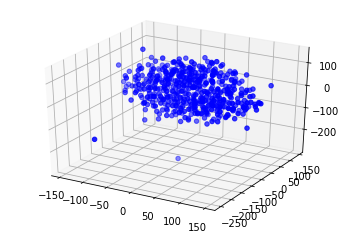

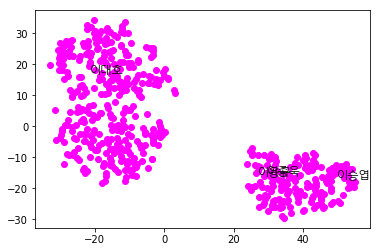

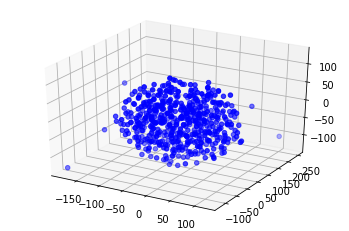

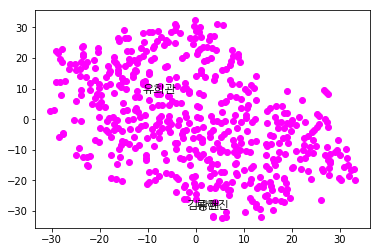

In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

NUM_PLAYERS = {"batter": NUM_BATTERS, "pitcher": NUM_PITCHERS}


def run_tsne(player_type):
    """Run t-SNE on the player vectors.

    :param player_type: 
    :return: 
    """
    params = {"batter": {"perplexity": 20, "learning_rate": 200, "init": "pca"},
              "pitcher": {"perplexity": 20, "learning_rate": 200, "init": "random"}}
    tsne = TSNE(n_components = 3, **params[player_type])
    manifold_3d = tsne.fit_transform(player_vecs[player_type])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection = "3d")
    ax.scatter(manifold_3d[:, 0], manifold_3d[:, 1], manifold_3d[:, 2], color = "blue")
    
    plt.show()

    params = {"batter": {"perplexity": 20, "learning_rate": 550, "init": "pca"},
              "pitcher": {"perplexity": 20, "learning_rate": 200, "init": "random"}}
    tsne = TSNE(n_components = 2, **params[player_type])
    manifold_2d = tsne.fit_transform(player_vecs[player_type])
    (x, y) = (manifold_2d[:, 0], manifold_2d[:, 1])
    
    plt.scatter(x, y, color = "magenta")
#     interesting_batters = {"이대호", "김선빈","정수빈", "이승엽", '최준석', '강정호', '박병호'}
    interesting_batters = {"이승엽", "이대호", "이종욱", "이용규"}
    interesting_pitchers = {"유희관", "김광현", "류현진"}
    interesting_players = {"batter": interesting_batters, "pitcher": interesting_pitchers}

    for i in range(NUM_PLAYERS[player_type]):
        player_name = categories[player_type][i]
        player_id = i
        if player_name in interesting_players[player_type]:
            plt.text(x[i], y[i], player_name, va = "top", family = "monospace", fontproperties=fontprop)

    plt.show()

    return manifold_3d


tsne_batters = run_tsne("batter")
tsne_pitchers = run_tsne("pitcher")